###  Which Landmarks Have the Most Nearby Listings?

The following bar chart displays the number of Airbnb listings located within 1 kilometer of each major landmark in Berlin.

- The highest concentration of nearby listings is found around **Pergamonmuseum**, **Fernsehturm**, and **Berlin Cathedral**.
- These results suggest that listings tend to cluster near popular tourist attractions and central locations.

This feature could be predictive of listing price, as proximity to high-traffic landmarks typically increases demand.


<Figure size 1000x600 with 0 Axes>

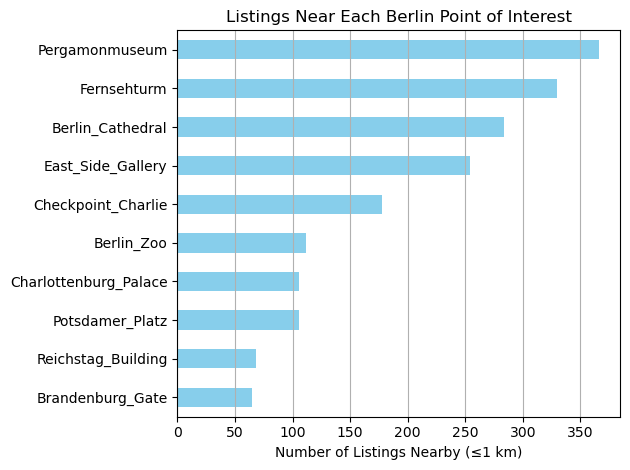

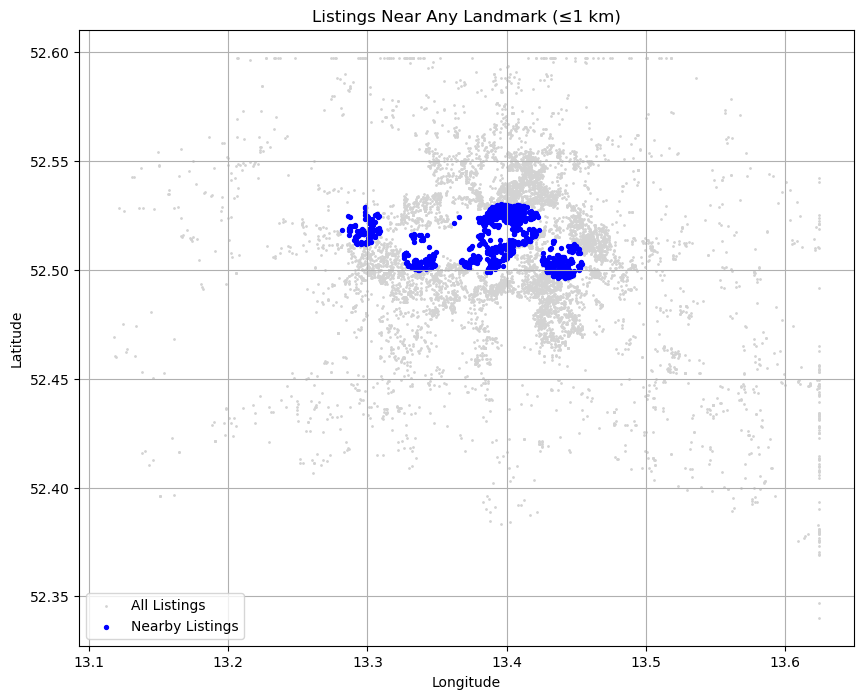

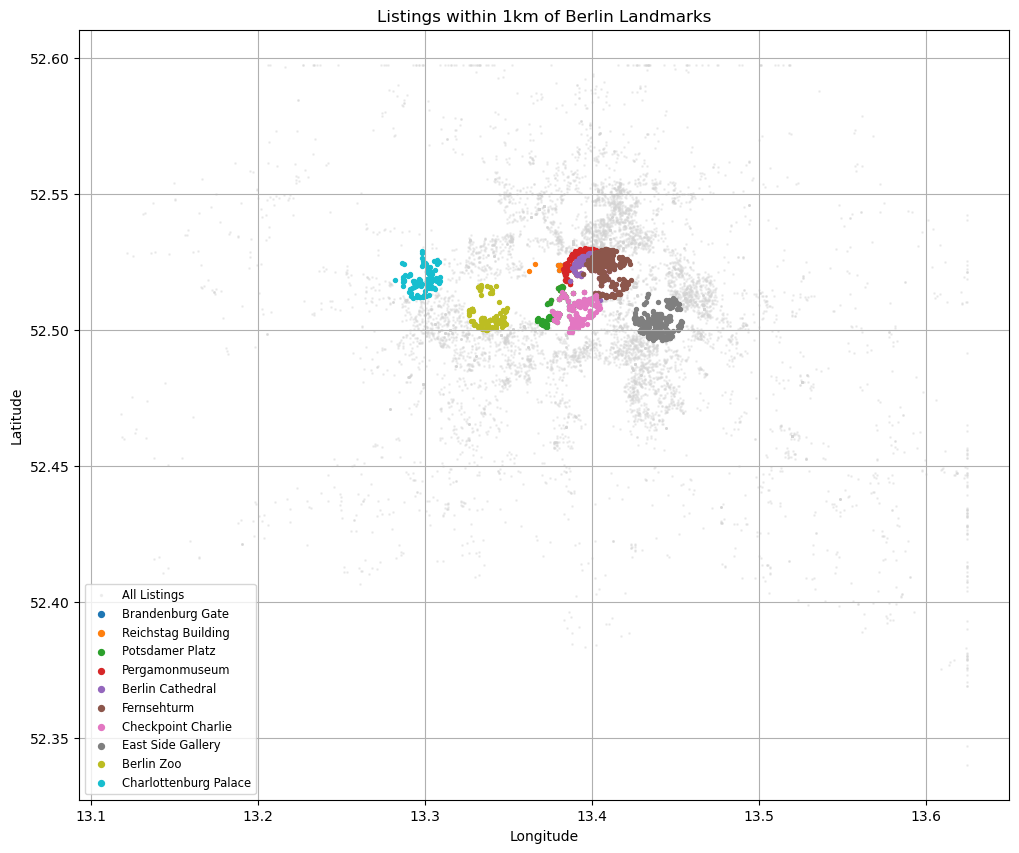

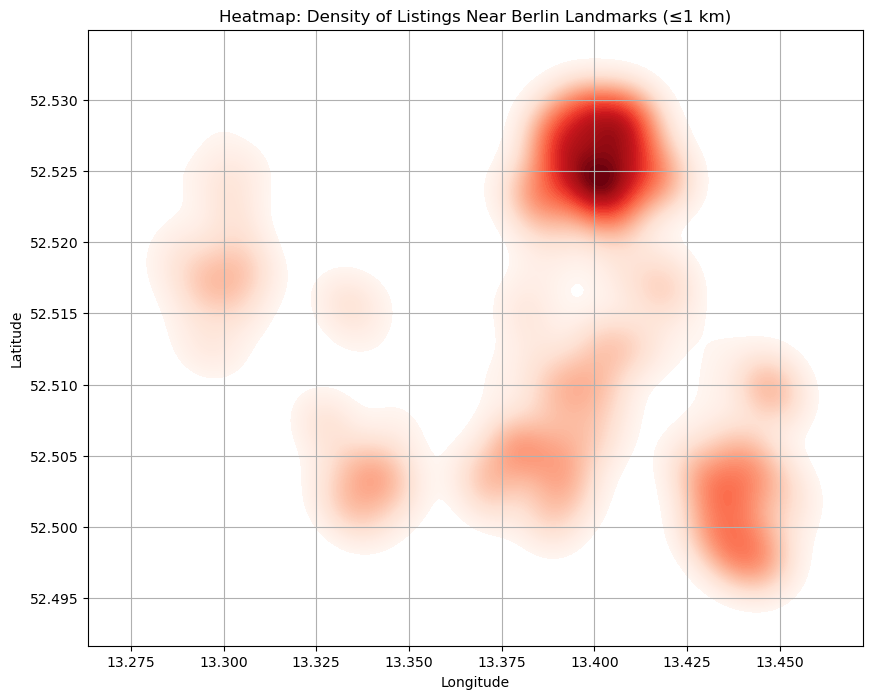

<Figure size 1200x1000 with 0 Axes>

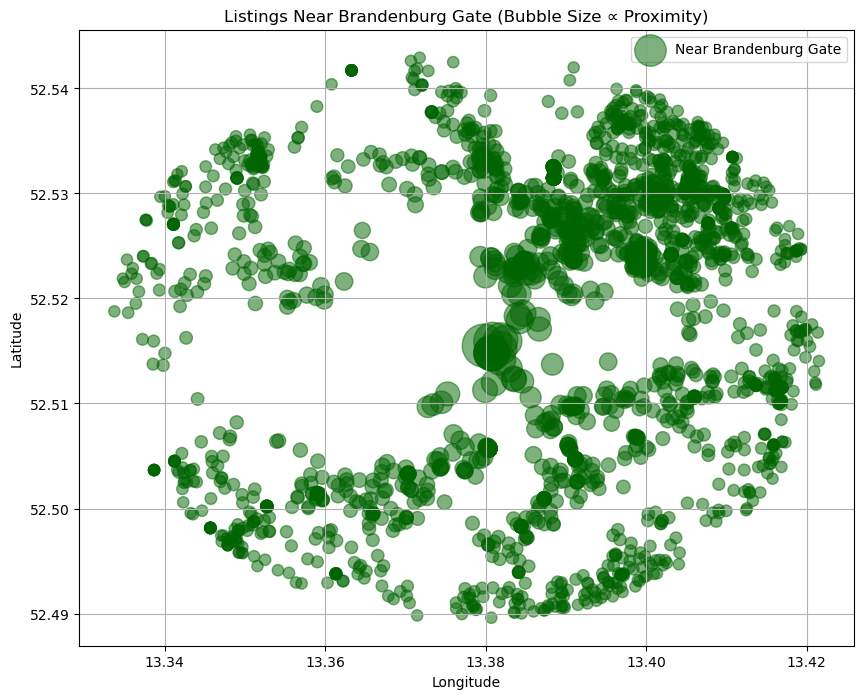

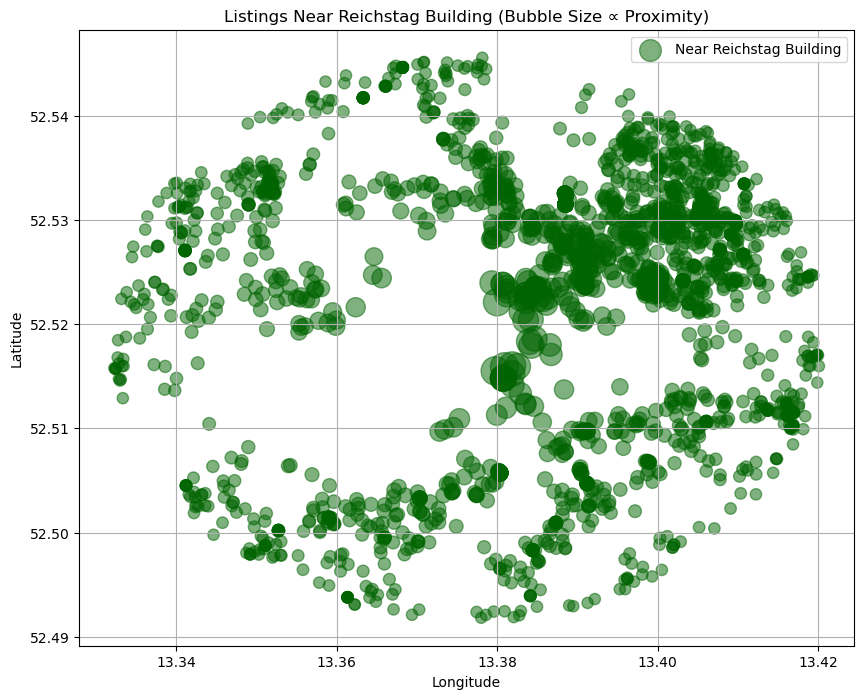

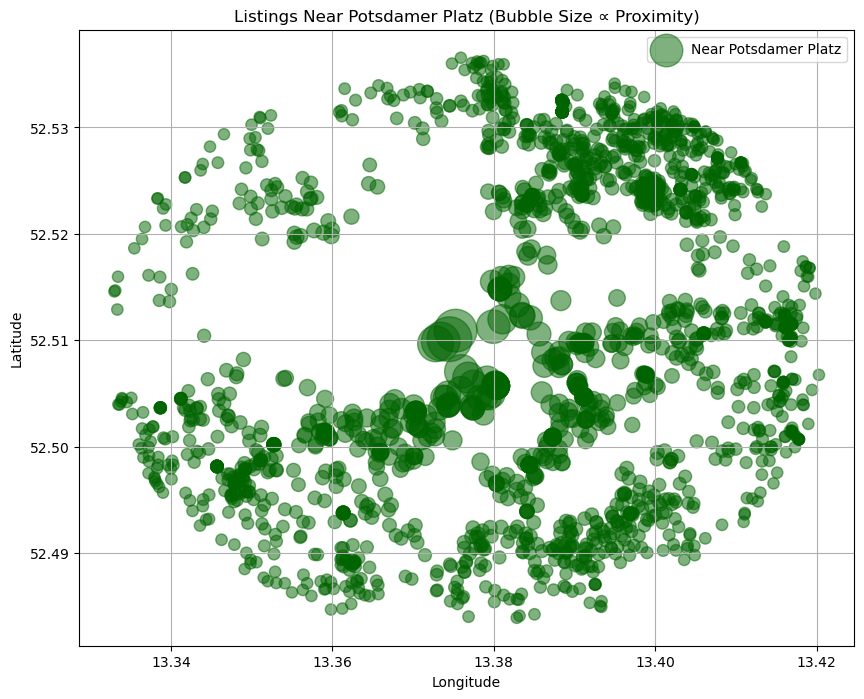

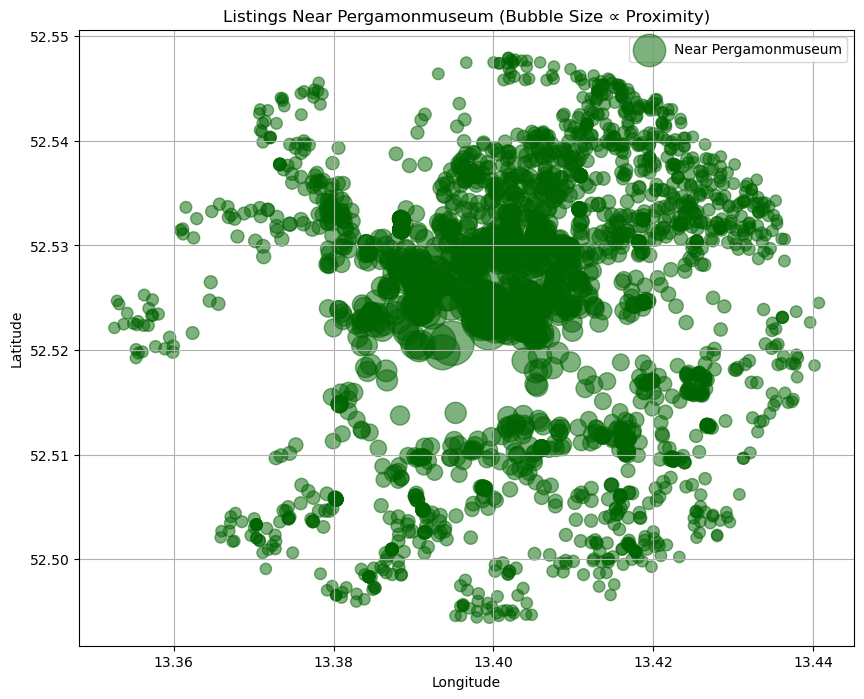

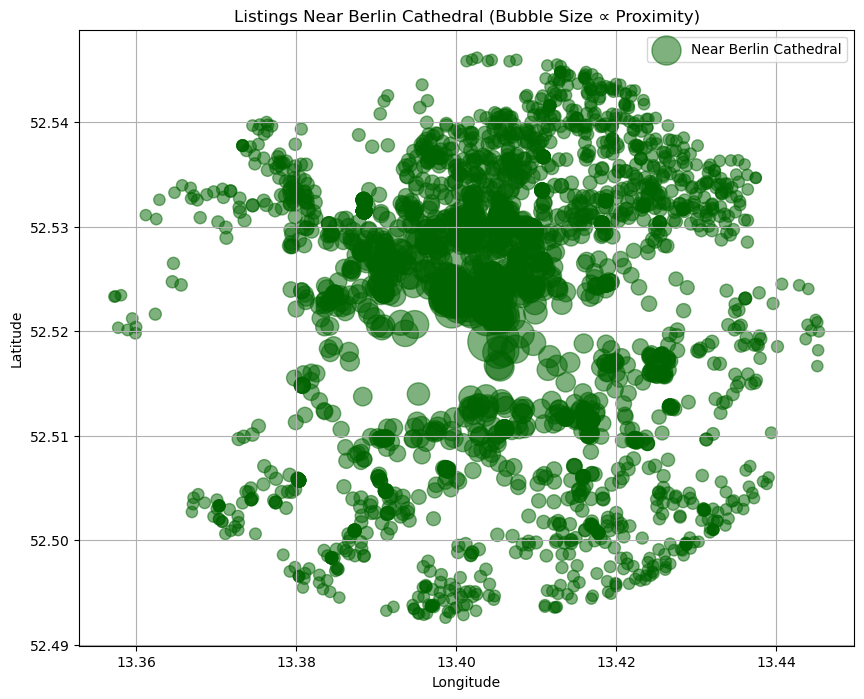

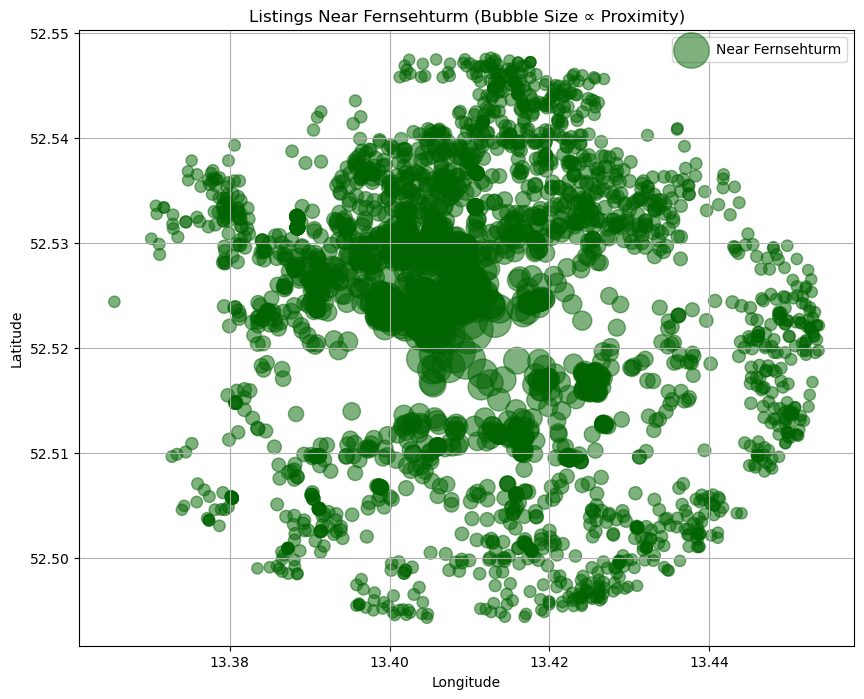

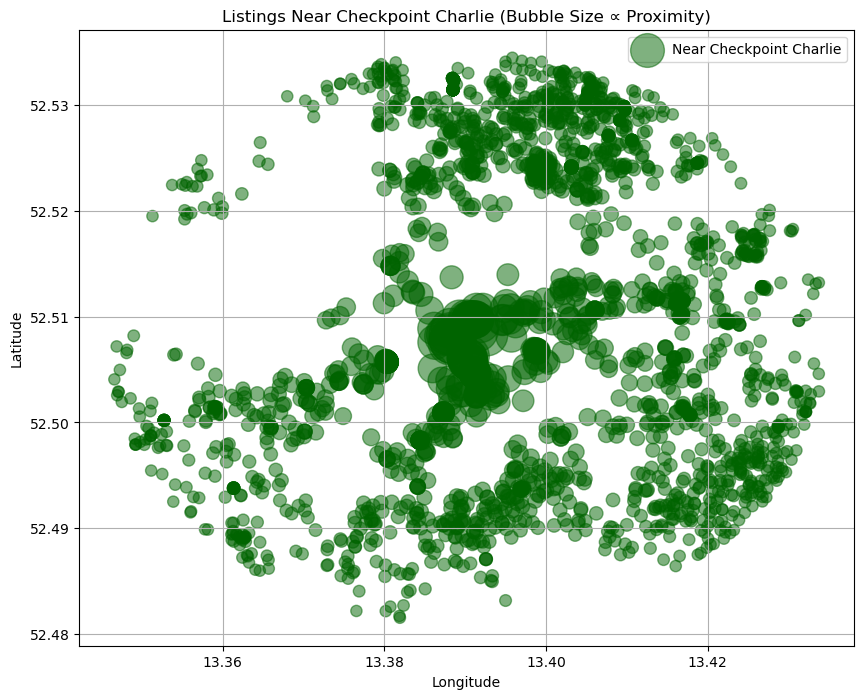

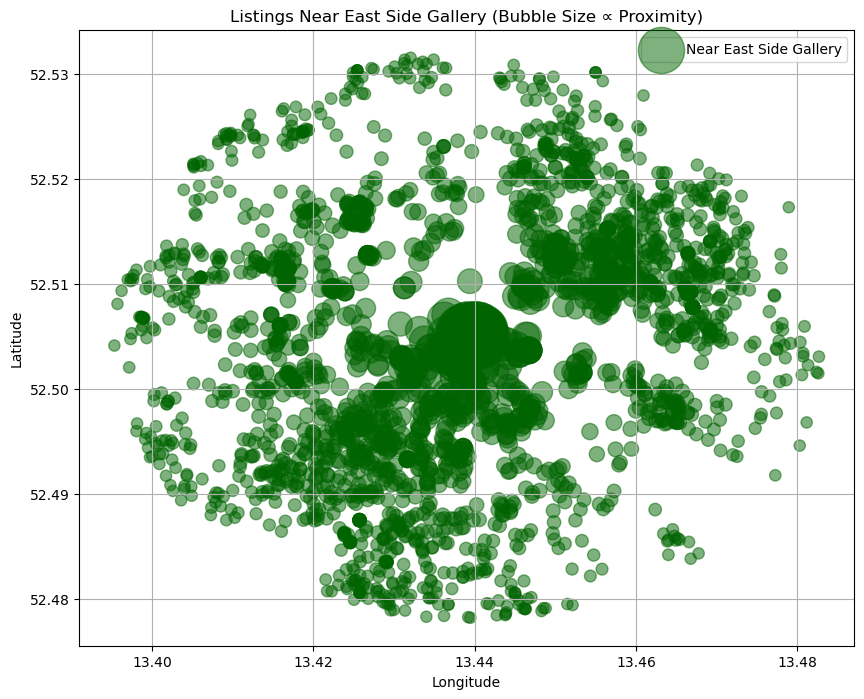

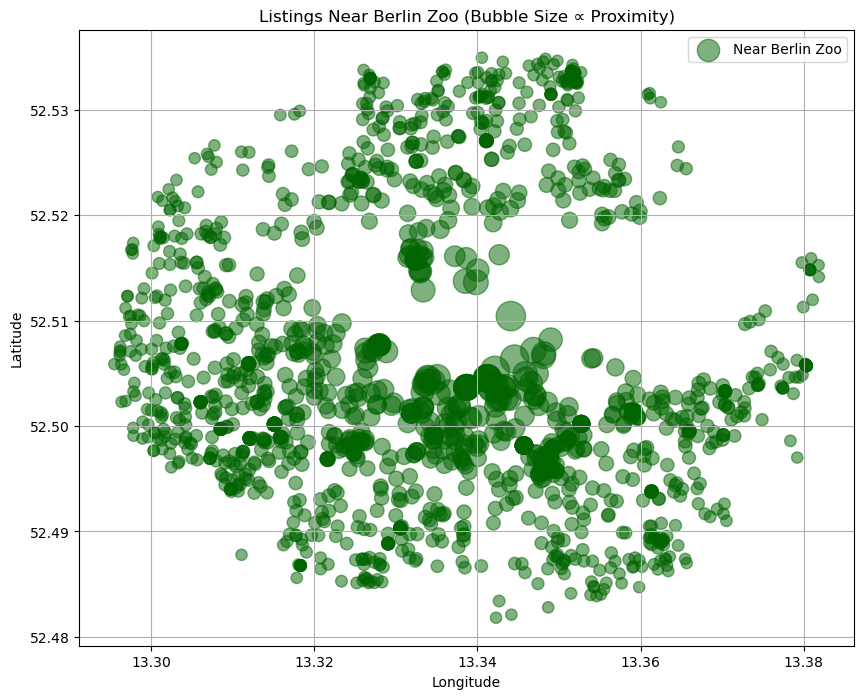

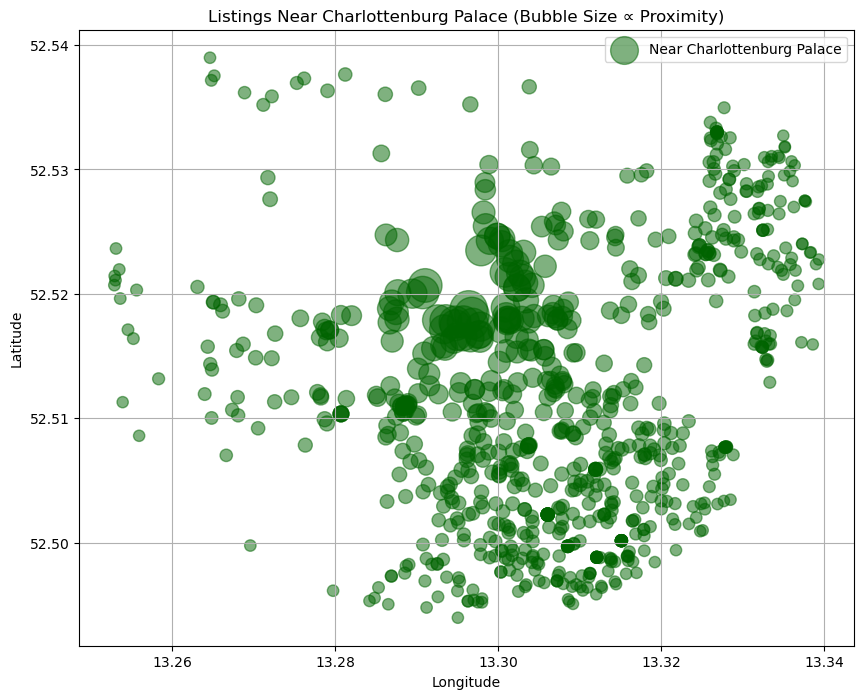

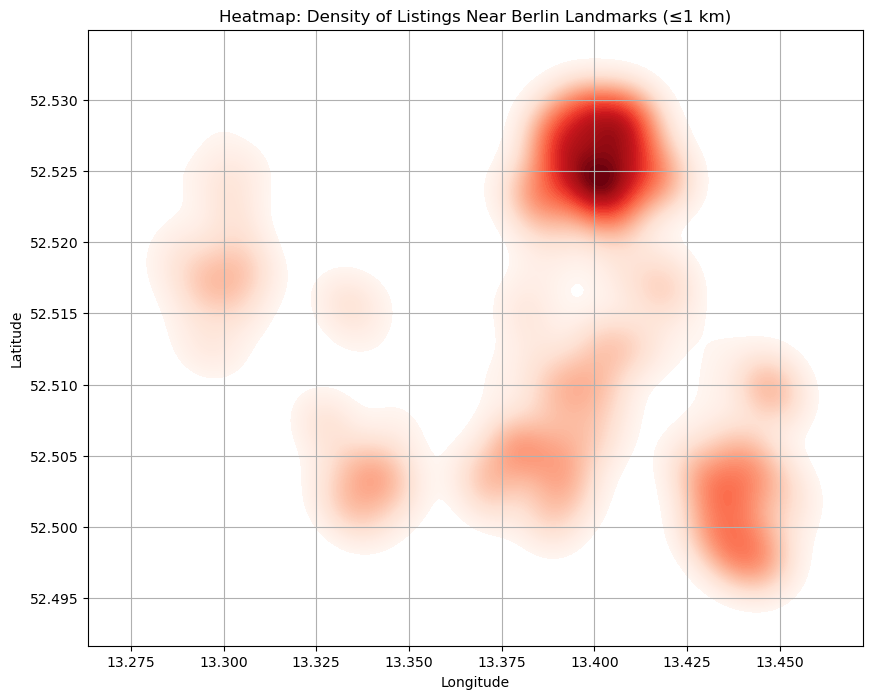

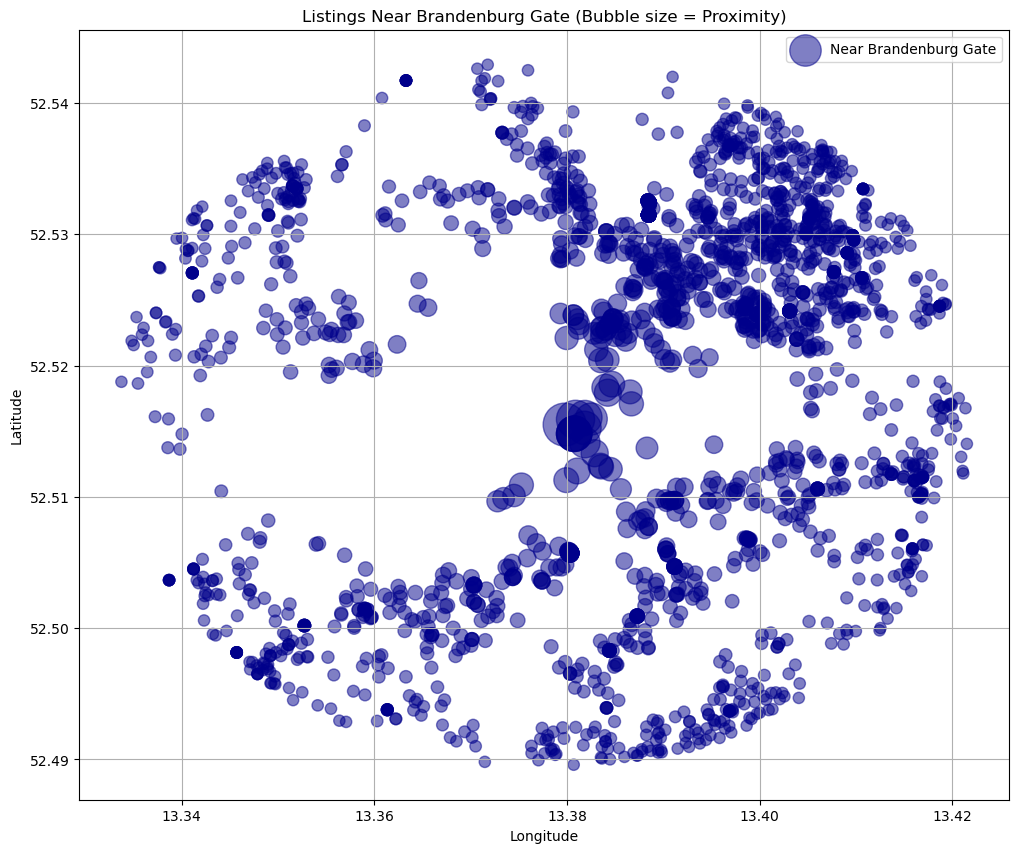

In [49]:
import pandas as pd


df = pd.read_csv("C:/Users/thage/Desktop/airbnb-price-prediction-main/data/processed/listings_encoded.csv")

import numpy as np

# The 10 most popular spots in Berlin
berlin_spots = {
    'Brandenburg_Gate': (52.516266, 13.377775),
    'Reichstag_Building': (52.518623, 13.376198),
    'Potsdamer_Platz': (52.509663, 13.376481),
    'Pergamonmuseum': (52.521187, 13.396760),
    'Berlin_Cathedral': (52.519444, 13.401111),
    'Fernsehturm': (52.520830, 13.409440),
    'Checkpoint_Charlie': (52.507740, 13.390380),
    'East_Side_Gallery': (52.504997, 13.439605),
    'Berlin_Zoo': (52.508450, 13.339230),
    'Charlottenburg_Palace': (52.520650, 13.295340),
}

# Distance calculation function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c


for name, (lat, lon) in berlin_spots.items():
    df[f'distance_to_{name}'] = haversine(df['latitude'], df['longitude'], lat, lon)


distance_threshold_km = 1.0


for name in berlin_spots.keys():
    dist_col = f'distance_to_{name}'
    near_col = f'is_near_{name}'
    df[near_col] = (df[dist_col] <= distance_threshold_km).astype(int)


nearby_counts = {
    name: df[f'is_near_{name}'].sum()
    for name in berlin_spots
}


pd.DataFrame.from_dict(nearby_counts, orient='index', columns=['Listings_Nearby']).sort_values('Listings_Nearby', ascending=False)
import matplotlib.pyplot as plt


nearby_counts_df = pd.DataFrame.from_dict({
    name: df[f'is_near_{name}'].sum()
    for name in berlin_spots
}, orient='index', columns=['Listings_Nearby']).sort_values('Listings_Nearby', ascending=True)

# Bar Plot
plt.figure(figsize=(10, 6))
nearby_counts_df.plot(kind='barh', legend=False, color='skyblue')
plt.xlabel("Number of Listings Nearby (≤1 km)")
plt.title("Listings Near Each Berlin Point of Interest")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(10, 8))


plt.scatter(df['longitude'], df['latitude'], s=1, color='lightgrey', label='All Listings')


df['any_POI_nearby'] = df[[f'is_near_{name}' for name in berlin_spots]].sum(axis=1) > 0
nearby_df = df[df['any_POI_nearby']]
plt.scatter(nearby_df['longitude'], nearby_df['latitude'], s=8, color='blue', label='Nearby Listings')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Listings Near Any Landmark (≤1 km)")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))


plt.scatter(df['longitude'], df['latitude'], s=1, color='lightgrey', label='All Listings', alpha=0.3)


colors = plt.cm.tab10.colors  # παλέτα 10 χρωμάτων


for i, name in enumerate(berlin_spots):
    poi_df = df[df[f'is_near_{name}'] == 1]
    if not poi_df.empty:
        plt.scatter(poi_df['longitude'], poi_df['latitude'],
                    s=8, color=colors[i % len(colors)],
                    label=name.replace("_", " "))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Listings within 1km of Berlin Landmarks")
plt.legend(loc='best', markerscale=1.5, fontsize='small')
plt.grid(True)
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt


nearby_df = df[df[[f'is_near_{name}' for name in berlin_spots]].sum(axis=1) > 0]

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=nearby_df['longitude'],
    y=nearby_df['latitude'],
    cmap="Reds",
    fill=True,
    thresh=0.05,
    bw_adjust=0.5,
    levels=100
)

plt.title("Heatmap: Density of Listings Near Berlin Landmarks (≤1 km)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 10))

import matplotlib.pyplot as plt

# Γράφημα για κάθε POI ξεχωριστά
for poi_name in berlin_spots.keys():
    dist_col = f'distance_to_{poi_name}'
    
    # Φιλτράρουμε μέχρι 3km για να μη γεμίσει το plot
    poi_df = df[df[dist_col] <= 3].copy()
    if poi_df.empty:
        continue  # αν δεν υπάρχουν listings κοντά, το προσπερνάμε

    # Υπολογισμός μεγέθους κύκλου (όσο πιο κοντά, τόσο μεγαλύτερος)
    sizes = (1 / (poi_df[dist_col] + 0.05)) * 200

    # Δημιουργία scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(poi_df['longitude'], poi_df['latitude'], s=sizes,
                alpha=0.5, color='darkgreen', label=f'Near {poi_name.replace("_", " ")}')

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Listings Near {poi_name.replace('_', ' ')} (Bubble Size ∝ Proximity)")
    plt.legend()
    plt.grid(True)
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Listings που είναι κοντά σε τουλάχιστον 1 POI
nearby_df = df[df[[f'is_near_{name}' for name in berlin_spots]].sum(axis=1) > 0]

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=nearby_df['longitude'],
    y=nearby_df['latitude'],
    cmap="Reds",
    fill=True,
    thresh=0.05,
    bw_adjust=0.5,
    levels=100
)

plt.title("Heatmap: Density of Listings Near Berlin Landmarks (≤1 km)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 10))

# Διάλεξε ένα συγκεκριμένο POI για παράδειγμα
poi_name = 'Brandenburg_Gate'
dist_col = f'distance_to_{poi_name}'

# Φιλτράρισμα για reasonable αποστάσεις (π.χ. μέχρι 3km)
mask = df[dist_col] <= 3
poi_df = df[mask]

# Αντιστρέφουμε την απόσταση για να έχουμε μεγαλύτερους κύκλους κοντά στο POI
sizes = (1 / (poi_df[dist_col] + 0.05)) * 200

plt.scatter(poi_df['longitude'], poi_df['latitude'], s=sizes,
            alpha=0.5, color='darkblue', label=f'Near {poi_name.replace("_", " ")}')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Listings Near {poi_name.replace('_', ' ')} (Bubble size = Proximity)")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt




###  Geospatial Distribution of Listings by Landmark Proximity

This scatter plot visualizes all Airbnb listings in Berlin:

- **Gray points** represent all listings in the dataset.
- **Colored points** indicate listings located within 1 kilometer of specific landmarks.
- Each color corresponds to a different Point of Interest (POI), such as Brandenburg Gate, Berlin Zoo, etc.

This plot reveals geographic clusters of listings near tourist hubs, helping us explore spatial correlations with price or occupancy.
###  Heatmap of Listings Near Major Landmarks

This heatmap shows the density of Airbnb listings that lie within 1 kilometer of at least one major landmark in Berlin.

- Darker red areas indicate higher concentrations of listings.
- Most hotspots are located in the central and eastern parts of the city, especially around the Pergamonmuseum and Fernsehturm.

This spatial visualization is useful for understanding local demand and identifying popular neighborhoods for short-term rentals.
###  Proximity Visualizations: Listings Near Each Landmark

For each landmark, we generated an individual scatter plot:

- Each point represents a listing.
- The **circle size is inversely proportional to its distance** from the landmark (closer listings appear larger).
- This highlights the spatial footprint of each POI and reveals how listings are distributed around them.

These proximity-based plots are helpful in detecting local clusters and assessing the influence of location on listing distribution.
##  Landmark-Based Spatial Feature Engineering for Airbnb Listings

In this notebook, we engineer and visualize spatial features based on the proximity of each Airbnb listing in Berlin to 10 major landmarks (e.g., Brandenburg Gate, Fernsehturm, Pergamonmuseum).

We calculate haversine distances and construct binary proximity flags (within 1 km), then explore their impact through bar charts, heatmaps, and geospatial scatter plots.

These features are intended to help improve price prediction models by capturing the effect of landmark proximity on listing demand and value.
